# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow
tensorflow.__version__

'2.1.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Project 6')
path = '.'

### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/Colab Notebooks/Project 6/Aligned Face Dataset from Pinterest.zip','r') as z:
    z.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    
    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

In [0]:
load_image('./PINS/pins_Aaron Paul/Aaron Paul0_262.jpg')


array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]

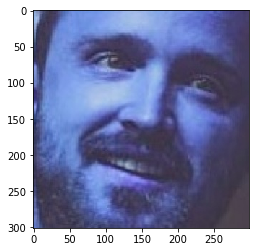

In [62]:
from matplotlib import pyplot as plt

img = cv2.imread('./PINS/pins_Aaron Paul/Aaron Paul0_262.jpg',1)
plt.imshow(img)
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
# Load the above model
model = vgg_face()
# Load VGG Face model weights
model.load_weights('vgg_face_weights.h5')

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [0]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
metadata.size

10770

In [0]:
import tensorflow.keras.backend as K


embeddings=[]
person_rep=dict()
person_folders=os.listdir(path+'/PINS/')
for i,person in enumerate(person_folders):
  person_rep[i]=person
  image_names=os.listdir('PINS/'+person+'/')
  for image_name in image_names:
    img_path = metadata[i].image_path()
    img = load_image(img_path)
# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    print(img.shape)
# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    print(embedding_vector.shape)
    embeddings.append(np.squeeze(K.eval(embedding_vector)).tolist())

(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224, 3)
(2622,)
(224, 224,

In [0]:
len(embeddings)

10770

In [0]:
embeddings[0]

[0.02801891602575779,
 -0.0011262852931395173,
 -0.012657488696277142,
 0.02961260825395584,
 0.03246228024363518,
 0.023653259500861168,
 0.0007478868355974555,
 0.015987271443009377,
 -0.01060475129634142,
 0.01184846367686987,
 0.01033180020749569,
 0.01134438905864954,
 -0.00302681396715343,
 -0.009948639199137688,
 0.01160727720707655,
 0.007619043346494436,
 0.02543959580361843,
 0.006785306613892317,
 0.01758640445768833,
 0.007955801673233509,
 0.0137798385694623,
 0.02392883226275444,
 0.013108285143971443,
 0.034437019377946854,
 0.014893325977027416,
 -0.0008491447661072016,
 0.0068384623154997826,
 0.008035355247557163,
 0.004797557834535837,
 0.0024525090120732784,
 0.01804598607122898,
 -0.006049209740012884,
 -0.007637920323759317,
 0.02840818651020527,
 -0.007086455821990967,
 -0.01236840058118105,
 -0.014074685983359814,
 -0.014542599208652973,
 0.012765218503773212,
 -0.0030688908882439137,
 0.010494884103536606,
 0.023995548486709595,
 0.012679287232458591,
 -0.02452

In [0]:
len(embeddings[0])

2622

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(list(set(emb1) - set(emb2))))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

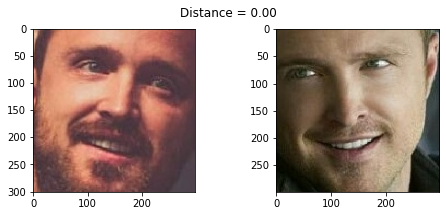

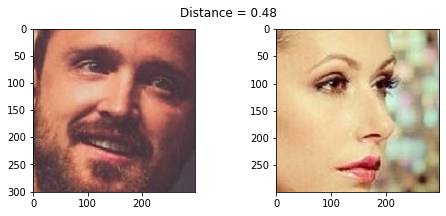

In [0]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

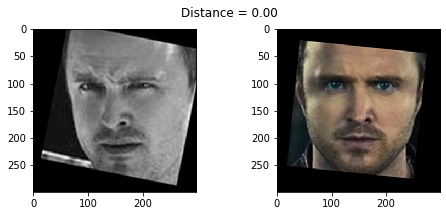

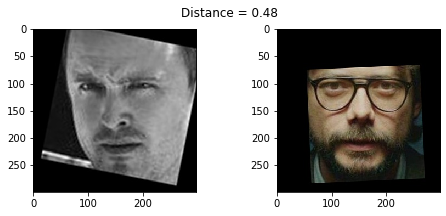

In [0]:
show_pair(30, 31)
show_pair(30, 100)

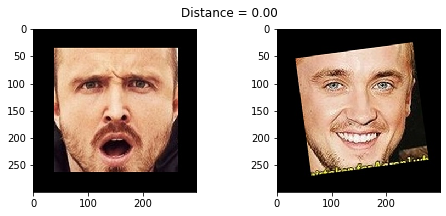

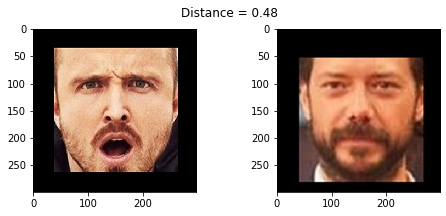

In [0]:
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

In [0]:
train_idx.shape

(10770,)

In [0]:
test_idx.shape

(10770,)

In [0]:
print(train_idx[0],train_idx[1], train_idx[2], train_idx[3], train_idx[4], train_idx[5], train_idx[6], train_idx[7], train_idx[8], train_idx[9], train_idx[10])
print(test_idx[0], test_idx[1], test_idx[2], test_idx[3], test_idx[4], test_idx[5], test_idx[6], test_idx[7], test_idx[8], test_idx[9], test_idx[10])

False True True True True True True True True False True
True False False False False False False False False True False


In [0]:
train_idx

array([False,  True,  True, ...,  True,  True,  True])

In [0]:
train_idx.dtype

dtype('bool')

In [0]:
z = np.count_nonzero(train_idx)
z #This is the number of training set data points#

9573

In [0]:
t = np.count_nonzero(test_idx)
t #This is the number of test set data points#

1197

In [0]:
true_list = np.nonzero(train_idx)[0]

In [0]:
len(true_list)

9573

In [0]:
print(true_list)

[    1     2     3 ... 10767 10768 10769]


In [0]:
X_train = []
for i in true_list :
    X_train.append(embeddings[i])

In [0]:
len(X_train) # Same size for train_idx and X_train

9573

In [0]:
print(X_train[0])

[0.02801891602575779, -0.0011262852931395173, -0.012657488696277142, 0.02961260825395584, 0.03246228024363518, 0.023653259500861168, 0.0007478868355974555, 0.015987271443009377, -0.01060475129634142, 0.01184846367686987, 0.01033180020749569, 0.01134438905864954, -0.00302681396715343, -0.009948639199137688, 0.01160727720707655, 0.007619043346494436, 0.02543959580361843, 0.006785306613892317, 0.01758640445768833, 0.007955801673233509, 0.0137798385694623, 0.02392883226275444, 0.013108285143971443, 0.034437019377946854, 0.014893325977027416, -0.0008491447661072016, 0.0068384623154997826, 0.008035355247557163, 0.004797557834535837, 0.0024525090120732784, 0.01804598607122898, -0.006049209740012884, -0.007637920323759317, 0.02840818651020527, -0.007086455821990967, -0.01236840058118105, -0.014074685983359814, -0.014542599208652973, 0.012765218503773212, -0.0030688908882439137, 0.010494884103536606, 0.023995548486709595, 0.012679287232458591, -0.024524757638573647, -0.014598115347325802, -0.01

In [0]:
len(X_train[0])

2622

In [0]:
true_list_test = np.nonzero(test_idx)[0]

In [0]:
X_test = []
for i in true_list_test :
    X_test.append(embeddings[i])

In [0]:
len(true_list_test) # Same size for test_idx and X_test

1197

### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
targets = np.array([m.name for m in metadata])

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(targets)

LabelEncoder()

In [0]:
# Numerical encoding of identities
y = encoder.transform(targets)
y_train = y[train_idx]
y_test = y[test_idx]


### Standardize the feature values (3 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA

# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

from sklearn.decomposition import PCA
pca = PCA(n_components=2622, random_state=10)
pca.fit(X_train_sd)

#generating the eigen values and the eigen vectors
## e_vals, e_vecs = np.linalg.eig(cov_matrix)
## print('Eigenvectors \n%s' %e_vecs)
## print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00010447  0.13675998 -0.17754373 ...  0.24061328 -0.11838807
   0.19979654]
 [ 0.13675998  1.00010447  0.45196166 ...  0.1196317   0.27083005
   0.10670821]
 [-0.17754373  0.45196166  1.00010447 ... -0.10332875  0.27372178
   0.05832305]
 ...
 [ 0.24061328  0.1196317  -0.10332875 ...  1.00010447  0.0872072
  -0.19703066]
 [-0.11838807  0.27083005  0.27372178 ...  0.0872072   1.00010447
   0.03374558]
 [ 0.19979654  0.10670821  0.05832305 ... -0.19703066  0.03374558
   1.00010447]]


PCA(copy=True, iterated_power='auto', n_components=2622, random_state=10,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
## Eigen Value
print(pca.explained_variance_)

[4.00877917e+02 2.74439177e+02 1.87626336e+02 ... 6.69309058e-32
 8.50216200e-33 2.07261378e-35]


[1.52874158e-01 1.04656945e-01 7.15510054e-02 ... 2.55239947e-35
 3.24228599e-36 7.90387978e-39]


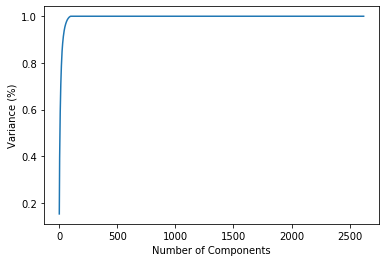

In [0]:
## Percentage of variation explained
significance = [np.abs(i)/np.sum(pca.explained_variance_) for i in pca.explained_variance_]
print(pca.explained_variance_ratio_)
# print(np.cumsum(significance))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(significance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

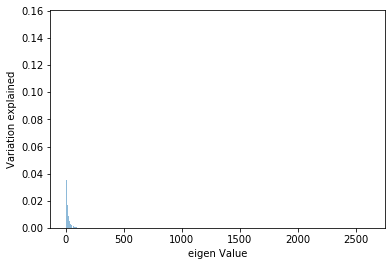

In [0]:
plt.bar(list(range(0,2622)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [0]:
# Revaluating PCA with 150 components
pca150 = PCA(n_components=150, random_state = 10)
pca150.fit(X_train_sd)
print(pca150.components_)
print(pca150.explained_variance_ratio_)
print(np.cumsum(pca150.explained_variance_ratio_))
Xpca150 = pca150.transform(X_train_sd)

[[-0.01657742  0.0208296   0.01656776 ...  0.00282556  0.01699524
  -0.02265026]
 [ 0.02710276  0.02791     0.00895052 ...  0.01118541  0.01520788
   0.01196799]
 [-0.01675184 -0.01559641  0.02055305 ... -0.00580594  0.01595181
  -0.0075271 ]
 ...
 [ 0.00617134  0.01730358 -0.01049318 ... -0.01500322 -0.0210919
  -0.00635093]
 [-0.02281728  0.02059675  0.02215988 ...  0.00829065  0.02358824
  -0.04713758]
 [-0.02214947 -0.02690591  0.04079439 ...  0.00843238  0.01151318
   0.00913923]]
[1.52874158e-01 1.04656945e-01 7.15510054e-02 6.47801621e-02
 4.59201896e-02 4.53931980e-02 3.84473369e-02 3.52539971e-02
 3.06222115e-02 2.80998578e-02 2.51712109e-02 2.26477258e-02
 2.20242964e-02 2.05211502e-02 1.82015187e-02 1.68581593e-02
 1.54183760e-02 1.50076523e-02 1.27976656e-02 1.26110788e-02
 1.23512123e-02 1.11627121e-02 9.93491732e-03 9.06462971e-03
 8.88630483e-03 8.35545732e-03 7.26220108e-03 6.44621212e-03
 6.01964991e-03 5.87720924e-03 5.54594789e-03 5.38189119e-03
 4.84475153e-03 4.751

### **The above results make it evident that the first 48 Principal Components can explain 95.15% variance in the input data. This is suggestive of the fact that the rest 102 *(150-48)* components need not be considered further for model building using SVM.**  

In [0]:
# Revaluating PCA with 48 components
pca48 = PCA(n_components=48, random_state = 10)
pca48.fit(X_train_sd)
print(pca48.components_)
print(pca48.explained_variance_ratio_)
print(np.cumsum(pca48.explained_variance_ratio_))
Xpca48 = pca48.transform(X_train_sd)

[[-0.01657742  0.0208296   0.01656776 ...  0.00282556  0.01699524
  -0.02265026]
 [ 0.02710276  0.02791     0.00895052 ...  0.01118541  0.01520788
   0.01196799]
 [-0.01675184 -0.01559641  0.02055305 ... -0.00580594  0.01595181
  -0.0075271 ]
 ...
 [ 0.00906216  0.02166325  0.01967146 ... -0.01718531 -0.01708117
   0.0059176 ]
 [ 0.01852005  0.00479082  0.00276957 ...  0.00387895  0.00088284
   0.01927291]
 [-0.02222149  0.00756827 -0.00815591 ... -0.00883973 -0.01935615
  -0.02676109]]
[0.15287416 0.10465694 0.07155101 0.06478016 0.04592019 0.0453932
 0.03844734 0.035254   0.03062221 0.02809986 0.02517121 0.02264773
 0.0220243  0.02052115 0.01820152 0.01685816 0.01541838 0.01500765
 0.01279767 0.01261108 0.01235121 0.01116271 0.00993492 0.00906463
 0.0088863  0.00835546 0.0072622  0.00644621 0.00601965 0.00587721
 0.00554595 0.00538189 0.00484475 0.00475107 0.0045595  0.00426576
 0.00398173 0.00391225 0.00375745 0.00352286 0.00329541 0.00314055
 0.00305606 0.00294838 0.00281711 0.0027

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [0]:
from sklearn.svm import SVC

In [66]:
model_SVM = SVC(C=1.0, kernel='rbf', gamma='auto', random_state=10)
model_SVM.fit(Xpca48, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [69]:
# Tranforming the X_test also to have 48 features instead of 2622, in order to do the model predict on X_test
# Revaluating test feature using PCA with 48 components
pca48_test = PCA(n_components=48, random_state = 10)
pca48_test.fit(X_test_sd)
print(pca48_test.components_)
print(pca48_test.explained_variance_ratio_)
print(np.cumsum(pca48_test.explained_variance_ratio_))
Xpca48_test = pca48_test.transform(X_test_sd)

[[-0.01637716  0.02081645  0.01643552 ...  0.00281286  0.01679982
  -0.02271476]
 [ 0.02683804  0.02781004  0.00870053 ...  0.01082164  0.01498165
   0.01249351]
 [-0.01880548 -0.01521771  0.0202051  ... -0.00709582  0.01690134
  -0.00601409]
 ...
 [ 0.00915167  0.02635739  0.00545057 ... -0.01751486 -0.01647252
   0.00233846]
 [ 0.01757099  0.00391314  0.00125268 ...  0.00568589  0.00450352
   0.02018783]
 [-0.02275667  0.00871023 -0.00973572 ... -0.00952621 -0.01712091
  -0.02742555]]
[0.1528305  0.10472912 0.07205757 0.06441384 0.0460097  0.04544233
 0.03895069 0.03532289 0.0302311  0.02830382 0.0247755  0.02281076
 0.02230082 0.02065051 0.01821055 0.01675802 0.01535679 0.01492466
 0.0127855  0.01268693 0.0123419  0.01115144 0.00993381 0.00904913
 0.00884302 0.00840519 0.00720105 0.0065005  0.00599264 0.00585677
 0.00547055 0.00538979 0.00484874 0.00472729 0.00457418 0.00423603
 0.00397794 0.00392466 0.00373962 0.00350578 0.003275   0.00314917
 0.00304082 0.00288968 0.0027749  0.002

In [74]:
from sklearn.metrics import accuracy_score
y_true, y_pred = y_test, model_SVM.predict(Xpca48_test)
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.9732664995822891


### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [89]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
print(example_image.shape)



(299, 299, 3)


In [93]:
# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
example_image = (example_image / 255.).astype(np.float32)

example_image = cv2.resize(example_image, dsize = (224,224))
print(example_image.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
embd_vctr_ex_img = vgg_face_descriptor.predict(np.expand_dims(example_image, axis=0))[0]
print(embd_vctr_ex_img.shape)

(224, 224, 3)
(2622,)


In [97]:
example_prediction = model_SVM.predict(embd_vctr_ex_img)
print(example_prediction)

ValueError: ignored

In [0]:
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');
